In [25]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 6000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 1000)

In [26]:
path_output = '/nfs/home/vyasa/projects/proj_off/data_off/clarify/spanish_comorbidity/new/output/'
df = pd.read_csv(path_output+'id_text_cuiLst.csv', encoding='utf-8')
df_id_text = pd.read_csv(path_output+'id_text_kg.csv', encoding='utf-8')
df_id_cui = pd.read_csv(path_output+'id_cuis_kg.csv', encoding='utf-8')
df_id_cui_cn = pd.read_csv(path_output+'id_cuis_cn.csv', encoding='utf-8')

In [27]:
df.head(5)

,Value_ID,value,replacement,google_abbr,deepl_abbr,mev_cui,google_abbr_cui,deepl_abbr_cui,mev_cui_len,google_abbr_cui_len,deepl_abbr_cui_len,google_deepl_abbr_cui,TEXT_ID,TEXT,FINAL_CUI,FINAL_CUI_len
0,A10000,Gastritis crÛnica,Chronic Gastritis,Chronic Gastritis,Chronic Gastritis,"['C0267146', 'C0341194', 'C0085695']","['C0267146', 'C0341194', 'C0085695']","['C0267146', 'C0341194', 'C0085695']",3,3,3,"['C0341194', 'C0085695', 'C0267146']",A10000,Gastritis crÛnica,"['C0267146', 'C0341194', 'C0085695']",3
1,A10001,Sarcoma PleomÛrfico Pectoral Mayor,Pectoralis Major Pleomorphic Sarcoma,Pectoralis Major Pleomorphic Sarcoma,Pectoralis Major PleomÛrfic Sarcoma,"['C0030747', 'C3674152', 'C0205825', 'C3675353', 'C0598607', 'C1261358']","['C0030747', 'C3674152', 'C0205825', 'C3675353', 'C0598607', 'C1261358']","['C0030747', 'C3674152', 'C3675353']",6,6,3,"['C0030747', 'C3674152', 'C0205825', 'C3675353', 'C0598607', 'C1261358']",A10001,Sarcoma PleomÛrfico Pectoral Mayor,"['C0030747', 'C3674152', 'C0205825', 'C3675353', 'C0598607', 'C1261358']",6
2,A10002,hiperuricemia,Hyperuricemia,Hyperuricemia,Hyperuricemia,"['C0740394', 'C4553069', 'C1856288']","['C0740394', 'C4553069', 'C1856288']","['C0740394', 'C4553069', 'C1856288']",3,3,3,"['C0740394', 'C4553069', 'C1856288']",A10002,hiperuricemia,"['C0740394', 'C4553069', 'C1856288']",3
3,A10003,intervenido pÛlipo colon,Colon Polyp Operated,Colon Plipo Intervened,Intervened PÛlipo Colon,"['C0267573', 'C2684091', 'C3888384', 'C0032584', 'C0009368', 'C3242339', 'C0027430']","['C3888384', 'C0009368', 'C2684091']","['C0122111', 'C1333906', 'C1705263']",7,3,3,"['C0122111', 'C2684091', 'C3888384', 'C1705263', 'C0009368', 'C1333906']",A10003,intervenido pÛlipo colon,"['C0267573', 'C2684091', 'C3888384', 'C0032584', 'C0009368', 'C3242339', 'C0027430']",7
4,A10004,intervenido estenosis aorta,Aortic Stenosis Operated,Operated Aortic Stenosis,Intervened Aortic Stenosis,"['C0685726', 'C0340335', 'C3242339', 'C0003507']","['C0349516', 'C0685726', 'C0003507']",['C0003507'],4,3,1,"['C0349516', 'C0685726', 'C0003507']",A10004,intervenido estenosis aorta,"['C0685726', 'C0340335', 'C3242339', 'C0003507']",4


In [28]:
df[['value']].to_csv(path_output+'text.csv', encoding='utf-8', index=False)

In [29]:
df_id_text.shape, df_id_cui.shape,

((5445, 2), (25363, 2))

<AxesSubplot:xlabel='FINAL_CUI'>

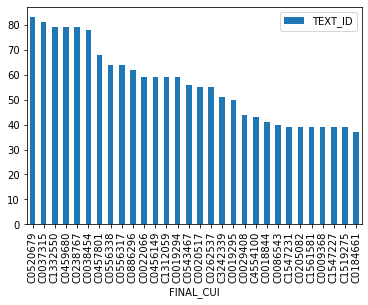

In [30]:
df_count = df_id_cui.groupby(['FINAL_CUI'])[['TEXT_ID']].count()
df_top = df_count.sort_values(['TEXT_ID'],ascending=False).iloc[0:30]
df_top.plot.bar()#x='lab', y='val', rot=0)

In [31]:
df[df['mev_cui_len']!=0].shape 

(1588, 16)

In [32]:
df[(df['google_abbr_cui_len']!=0)& (df['deepl_abbr_cui_len']==0) & (df['mev_cui_len']==0)].shape

(178, 16)

In [33]:
df[(df['google_abbr_cui_len']==0)& (df['deepl_abbr_cui_len']!=0) & (df['mev_cui_len']==0)].shape

(153, 16)

In [34]:
df[(df['google_abbr_cui_len']!=0)& (df['deepl_abbr_cui_len']!=0)& (df['mev_cui_len']==0)].shape

(3532, 16)

In [35]:
df[(df['google_abbr_cui_len']==0)& (df['deepl_abbr_cui_len']==0)& (df['mev_cui_len']==0)].shape

(2, 16)

In [36]:
df.shape

(5453, 16)

In [37]:
5453-3532-178-153-1588

2

In [38]:
df[df['FINAL_CUI_len']==0][['Value_ID', 'value','replacement']].to_csv(path_output+'nothaving_cui.csv', encoding='utf-8',\
    index=False)
df[df['FINAL_CUI_len']==0]

,Value_ID,value,replacement,google_abbr,deepl_abbr,mev_cui,google_abbr_cui,deepl_abbr_cui,mev_cui_len,google_abbr_cui_len,deepl_abbr_cui_len,google_deepl_abbr_cui,TEXT_ID,TEXT,FINAL_CUI,FINAL_CUI_len
817,A10814,"ProtrusiÛn C3-C4,",NaN,"Protrusion C3-C4,","C3-C4 Protrusion,",[],[],[],0,0,0,[],A10814,"ProtrusiÛn C3-C4,",[],0
3383,A13379,CIRUGIA APENDICITIS,Surgery Appendicitis,APPENDICITIS SURGERY,APPENDICITIS SURGERY,[],[],[],0,0,0,[],A13379,CIRUGIA APENDICITIS,[],0


In [39]:
df_id_cui_cn.head(1)

,TEXT_ID,FINAL_CUI,Canonical_Name
0,A10000,C0267146,Chronic antral gastritis


In [40]:
df_count_cn = df_id_cui_cn.groupby(['FINAL_CUI'])[['TEXT_ID']].count()
df_top_cn = df_count_cn.sort_values(['TEXT_ID'],ascending=False)
cui_cn_dict = dict(zip(df_id_cui_cn.FINAL_CUI, df_id_cui_cn.Canonical_Name))
df_top_cn.head(10)

,TEXT_ID
FINAL_CUI,
C0520679,83
C0037315,81
C1332550,79
C0459680,79
C0238767,79
C0038454,78
C0457801,68
C0556338,64
C0556317,64


In [41]:
df_top_cn['CUI'] = df_top_cn.index
df_top_cn['Canonical_Name'] = df_top_cn['CUI'].apply(lambda x : cui_cn_dict[x])
df_top_cn['TEXT_ID_COUNT'] = df_top_cn['TEXT_ID']

In [42]:
df_top_cn_new = df_top_cn[['CUI', 'TEXT_ID_COUNT', 'Canonical_Name']]

In [16]:
df_top_cn_new.head(10)

,CUI,TEXT_ID_COUNT,Canonical_Name
FINAL_CUI,,,
C0520679,C0520679,83,"Sleep Apnea, Obstructive"
C0037315,C0037315,81,Sleep Apnea Syndromes
C1332550,C1332550,79,Bilateral Mass
C0459680,C0459680,79,Bilateral lateral rectus
C0238767,C0238767,79,Bilateral
C0038454,C0038454,78,Cerebrovascular accident
C0457801,C0457801,68,Current non-drinker of alcohol
C0556338,C0556338,64,Drinker
C0556317,C0556317,64,Drinks alone


In [49]:
df_top_cn_new['CUI']=df_top_cn_new['CUI']+'\n'+ df_top_cn_new['Canonical_Name']
df_top_cn_new.head(10)

ipykernel_launcher:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,CUI,TEXT_ID_COUNT,Canonical_Name
FINAL_CUI,,,
C0520679,"C0520679\nSleep Apnea, Obstructive",83,"Sleep Apnea, Obstructive"
C0037315,C0037315\nSleep Apnea Syndromes,81,Sleep Apnea Syndromes
C1332550,C1332550\nBilateral Mass,79,Bilateral Mass
C0459680,C0459680\nBilateral lateral rectus,79,Bilateral lateral rectus
C0238767,C0238767\nBilateral,79,Bilateral
C0038454,C0038454\nCerebrovascular accident,78,Cerebrovascular accident
C0457801,C0457801\nCurrent non-drinker of alcohol,68,Current non-drinker of alcohol
C0556338,C0556338\nDrinker,64,Drinker
C0556317,C0556317\nDrinks alone,64,Drinks alone


In [50]:
import plotly.express as px
fig = px.bar(df_top_cn_new.iloc[0:10], y='TEXT_ID_COUNT', x='CUI', text='TEXT_ID_COUNT', hover_data=['Canonical_Name'], width=1000, height=500, labels='Canonical_Name')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',xaxis_tickangle=-45)
fig.show()
fig.write_html(path_output+"plot1.html")

In [18]:
df[df['value'].str.contains(" EN ")][['Value_ID','value','replacement','google_abbr','deepl_abbr']].to_csv(path_output+'EN_wrong_replaced.csv', encoding='utf-8', index=False)